In [71]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy.signal import resample

import sys
import os
sys.path.append("../") # for importing utils and glm

import pandas as pd

# plotting packages
%matplotlib inline
from matplotlib.pyplot import * # plotting functions
import seaborn as sns           # data visualization package
sns.set_style("whitegrid")
sns.set_palette("cubehelix",7)

In [72]:
figroot = "/scratch/dstrf/figures/crcns_population/"


rcParams["svg.fonttype"]='none'
rc('font',**{'family':'serif','serif':['Times']})
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

ch = sns.color_palette("cubehelix",16).as_hex()
ch4 = sns.color_palette("cubehelix",4).as_hex()

rcParams["svg.fonttype"]='none'
rc('font',**{'family':'serif','serif':['Times']})
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

In [73]:
WX = "w0"
EOcut = 0.25
CORcut = 0.15

In [31]:
#exclude = ["oo0108_4_B","oo1220_1_B","pupu0333_4_B","oo1220_5_A", "pipu1018_11_B", "yy1617_3_B"]
exclude = []

# load mcmc results
folder = "cm"
root = "/scratch/tyler/dstrf/results/second_run/"
path = "/".join([root,folder,""])

cm_results = {}
for root, directories, filenames in os.walk(path):
    for filename in filenames: 
        if root.split("/")[6] in exclude: 
            pass
        else:
            name, ext = filename.split(".")
            if ext == "npz":
                cm_results[name] = np.load(os.path.join(root,filename))
cm_maxlik = np.asarray([cm_results[m][WX][:3] for m in cm_results.keys() if cm_results[m]["eo"] > EOcut and cm_results[m]["corr"] > CORcut])
#cm_chain = np.asarray([cm_results[m]['chain'] for m in cm_results.keys()])

#s = cm_chain.shape
#cm_chain = cm_chain.reshape(s[0] * s[1], s[2])

In [52]:
# load mcmc results
folder = "l2a"
root = "/scratch/tyler/dstrf/results/"
path = "/".join([root,folder,""])

l2a_results = {}
for root, directories, filenames in os.walk(path):
    for filename in filenames: 
        if root.split("/")[6] in exclude: pass
        else:
            name, ext = filename.split(".")
            if ext == "npz":
                l2a_results[name] = np.load(os.path.join(root,filename))

l2a_maxlik = np.asarray([l2a_results[m][WX][:3] for m in l2a_results.keys() if l2a_results[m]["eo"] > EOcut and l2a_results[m]["corr"] > CORcut])
#l2a_chain = np.asarray([l2a_results[m]['chain'] for m in l2a_results.keys()])

#s = l2a_chain.shape
#l2a_chain = l2a_chain.reshape(s[0] * s[1], s[2])

In [53]:
# load mcmc results
folder = "ov"
root = "/scratch/tyler/dstrf/results/"
path = "/".join([root,folder,""])

ov_results = {}
for root, directories, filenames in os.walk(path):
    for filename in filenames: 
        if root.split("/")[6] in exclude: pass
        else:
            name, ext = filename.split(".")
            if ext == "npz":
                ov_results[name] = np.load(os.path.join(root,filename))

               # with open(filename, 'rb') as interfile:
               #     ml_data = pickle.load(interfile)
               # ov_results[name] = np.load(os.path.join(root,filename))
                
ov_maxlik = np.asarray([ov_results[m][WX][:3] for m in ov_results.keys() if ov_results[m]["eo"] > EOcut and ov_results[m]["corr"] > CORcut])


In [54]:
import pickle
# load mcmc results

def load_mldat(folder,root="/scratch/tyler/dstrf/results/"):

    path = "/".join([root,folder,""])
    results = {}
    for root, directories, filenames in os.walk(path):
        for filename in filenames: 
            if root.split("/")[6] in exclude: pass
            else:
                name, ext = filename.split(".")
                if ext == "dat":
                    with open(root+"/"+filename, 'rb') as interfile:
                        results[name] = pickle.load(interfile)
                    
    maxlik = np.asarray([results[m]["w0"][:3] for m in results.keys()])
    return results,maxlik

l1_results, l1_maxlik = load_mldat("l1")
l3_results, l3_maxlik = load_mldat("l3")
l2b_results, l2b_maxlik = load_mldat("l2b")


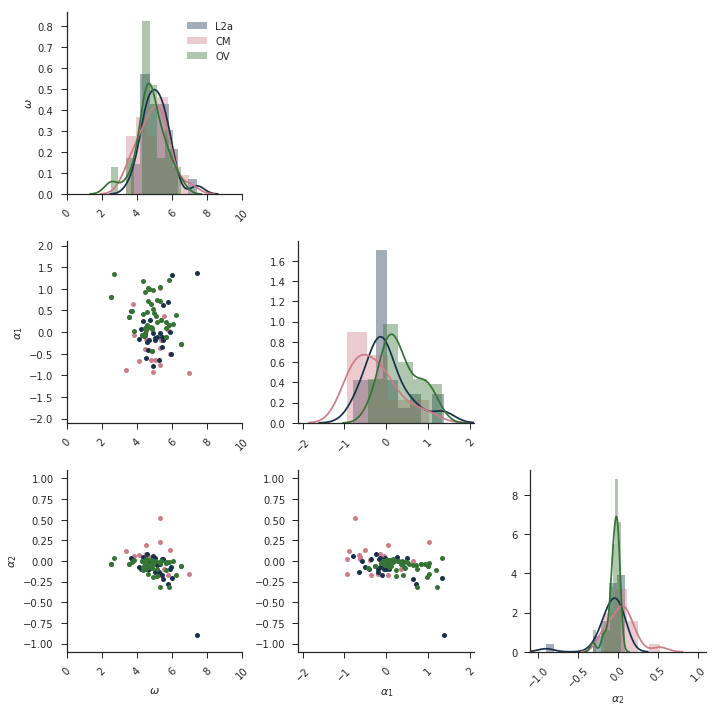

In [34]:
sns.set_style("ticks")

matlabs = [r'$\alpha_1$',r'$\alpha_2$',r'$\beta$',r'$\omega$']
mrange=[[0, 10],
        [-2.1,  2.1],
        [-1.1,  1.1]],

figure(figsize=(10,10))
for i in range(3):
    for j in range(3):
        if j > i: break
        subplot(3,3,3*i+j+1)

        if i == j:
            sns.distplot(l2a_maxlik[:,j],hist=True,label="L2a",color=ch[2])
            sns.distplot(cm_maxlik[:,i],hist=True,label="CM",color=ch[9])
            sns.distplot(ov_maxlik[:,i],hist=True,label="OV",color=ch[5])
            xlim(mrange[0][i])
        else:
            plot(cm_maxlik[:,j],cm_maxlik[:,i],'.',alpha=1,color=ch[9],markersize=10)
            plot(l2a_maxlik[:,j],l2a_maxlik[:,i],'.',alpha=1,color=ch[2],markersize=10)
            plot(ov_maxlik[:,j],ov_maxlik[:,i],'.',alpha=1,color=ch[5],markersize=10)

            xlim(mrange[0][j])
            ylim(mrange[0][i])
            
        if i == 0 and j == 0:
            legend()
        
        xticks(rotation=45)    
        sns.despine()
            
        if 3*i+j == 3: ylabel(r'$\alpha_1$');
        if 3*i+j == 6: ylabel(r'$\alpha_2$')
#         if 6*i+j == 12: ylabel("beta")
        if 3*i+j == 0: ylabel(r'$\omega$')
#         if 6*i+j == 24: ylabel("tau1")
        if 3*i+j == 7: xlabel(r'$\alpha_1$')
        if 3*i+j == 8: xlabel(r'$\alpha_2$')
#         if 6*i+j == 32: xlabel("beta")
        if 3*i+j == 6: xlabel(r'$\omega$')
#         if 6*i+j == 34: xlabel("tau1")
#         if 6*i+j == 35: xlabel("tau2")


tight_layout()

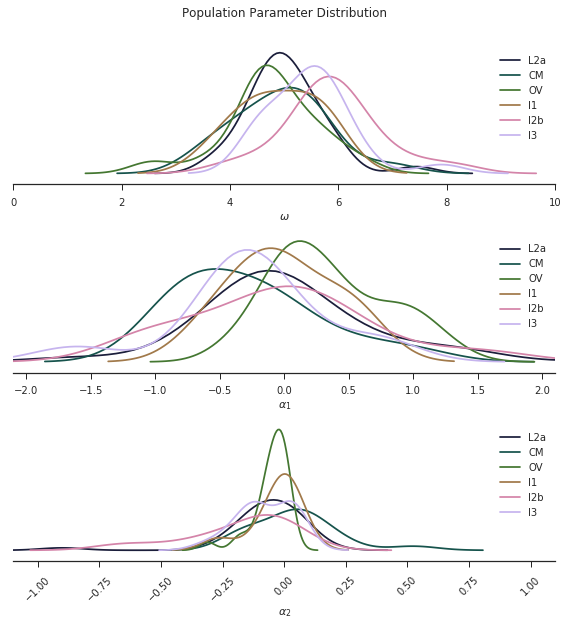

In [112]:
sns.set_style("ticks")

figure(figsize=(8,8))

matlabs =  [r'$\omega$',r'$\alpha_1$',r'$\alpha_2$']

mrange=[[0, 10],
        [-2.1,  2.1],
        [-1.1,  1.1]],


HIST = False

for i in range(3):
    subplot(3,1,i+1)
    sns.distplot(l2a_maxlik[:,i],hist=HIST,label="L2a")#,color=ch[2])
    sns.distplot(cm_maxlik[:,i],hist=HIST,label="CM")#,color=ch[9])
    sns.distplot(ov_maxlik[:,i],hist=HIST,label="OV")#,color=ch[9])
    sns.distplot(l1_maxlik[:,i],hist=HIST,label="l1")#,color=ch[9])
    sns.distplot(l2b_maxlik[:,i],hist=HIST,label="l2b")#,color=ch[9])
    sns.distplot(l3_maxlik[:,i],hist=HIST,label="l3")#,color=ch[9])
    xlim(mrange[0][i])



    
    xlabel(matlabs[i])
    yticks([])
    sns.despine()
    
suptitle("Population Parameter Distribution",y=1.04)

tight_layout()
sns.despine(offset=5,left=True)
xticks(rotation=45)    
legend()
#savefig(figroot+"mat.svg",bbox_inches='tight')

In [105]:
dellist = []
for i,a in enumerate(l1_maxlik):
    if max(np.abs(a)) > 10:
        dellist.append(i)

l1_maxlik = np.delete(l1_maxlik,dellist,0)